<a href="https://colab.research.google.com/github/TheRaconteurs/ml_lessons/blob/main/binary_classification/fld_loss_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Binary classification** using FLD Loss Function

>#### ${L_i(\omega)=(1-M_i)^2=(1-\omega^T\cdot x_i\cdot y_i)^2}$
>#### ${Q(\omega)=\sum_{i=1}^l(1-\omega^T\cdot x_i\cdot y_i)^2\rightarrow \min(\omega)}$
>#### ${\frac{dQ(\omega)}{d\omega}=-2\cdot\sum_{i=1}^l(1-\omega^T\cdot x_i\cdot y_i)\cdot x_i^T\cdot y_i=0}$
>#### ${\sum_{i=1}^l x_i^T\cdot y_i-\omega^T\cdot\sum_{i=1}^l x_i\cdot x_i^T\cdot y_i^2=0}$
>#### ${\omega^T=\sum_{i=1}^l x_i^T\cdot y_i\cdot (\sum_{i=1}^l x_i\cdot x_i^T)^{-1}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [1] for x in x_train]
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

In [14]:
pt = np.sum([x * y for x, y in zip(x_train, y_train)], axis=0)
xxt = np.sum([np.outer(x, x) for x in x_train], axis=0)
w = np.dot(pt, np.linalg.inv(xxt))
print(f'w[1] = {round(w[0], 3)}\nw[2] = {round(w[1], 3)}\nw[0] = {round(w[2], 3)}')
print(f'y = kx + b, k = -w[1]/w[2] = {round(-w[0] / w[1], 3)}')

w[1] = 0.058
w[2] = -0.035
w[0] = 0.191
y = kx + b, k = -w[1]/w[2] = 1.673


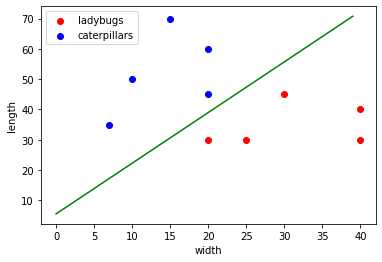

In [15]:
line_x = list(range(max(x_train[:, 0])))
line_y = [-x * (w[0] / w[1]) - (w[2] / w[1]) for x in line_x]

x_0 = x_train[y_train == 1]
x_1 = x_train[y_train == -1]

plt.scatter(x_0[:, 0], x_0[:, 1], color='red', label='ladybugs')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue', label='caterpillars')
plt.plot(line_x, line_y, color='green')

plt.ylabel("length")
plt.xlabel("width")
# plt.grid(True)
plt.legend()

plt.show()